# Understanding the credit card customer landscape

## table of contents
* Introduction and Context
* Preliminary Glimpse Into the Data
* Feature Engineering
* Scaling the Data
* Choose the best K value
* Analyzing Results
* Conclusion
* Next Steps

### 1. Introduction and context

#### 1.1 background

In this project we shall be acting as data scientists in a credit card company. We are investigating a credit card dataset to find a cluster different instinct groups of customers so that we may apply bespoke business strategies for each group.

The features are as follows:
1. `customer_id`: unique identifier for each customer.
2. `age`: customer age in years.
3. `gender`: customer gender (`M` or `F`).
4. `dependent_count`: number of dependents of each customer.
5. `education_level`: level of education (`High School`, `Graduate`, etc.).
6. `marital_status`: marital status (`Single`, `Married`, etc.).
7. `estimated_income`: the estimated income for the customer projected by the data science team.
8. `months_on_book`: time as a customer in months.
9. `total_relationship_count`: number of times the customer contacted the company.
10. `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
11. `credit_limit`: customer's credit limit.
12. `total_trans_amount`: the overall amount of money spent on the card by the customer.
13. `total_trans_count`: the overall number of times the customer used the card.
14. `avg_utilization_ratio`: daily average utilization ratio.

### 1.2 Goal

Our goal will be to segment the customer data into distinct and well defined groups, with identifying features. From this we shall have a comprehensive understanding of each group of customers, enabling more targeted and effective marketing for our product.

### 1.3 Summary


Our analysis has identified 6 distinct customer profiles within the dataset, differentiated by factors such as gender, age, marital status, income, and spending patterns. 

By deeply understanding these unique customer segments, we can develop tailored strategies to better serve their needs and preferences.

This granular customer intelligence will enable more effective acquisition, retention and relationship-building efforts, helping us adapt to evolving market dynamics over time. 

Moving forward, continued monitoring and refinement of these customer clusters will be crucial to sustaining a competitive edge.

# 2. Preliminary glimpse into the data

In this section we shall focus on the boilerplate code of loading the required libraries, as well as reading in the data and displaying the initial information of the dataset.

In [7]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#style
plt.style.use('seaborn-v0_8')

#reading in the data
data = pd.read_csv("C:/Users/Sam Morley/Documents/Data science studies/Datasets/customer credit card segmentation/customer_segmentation.csv")

In [8]:
#Glimpse into first 5 rows
data.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [9]:
#Shape of data aswell as checking for any null values
print( f" Shape of the data- rows: {data.shape[0]}, columns: {data.shape[1]}\n")
print(f"{data.info()}")


 Shape of the data- rows: 10127, columns: 14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization

We can see that this dataset has 10,127 customers, which means we have a good sample size for our investigating. Looking futher into the information of each column we can also see that there are no null values, which could be a good sign that it is a clean dataset.

Of the features, 11 are numerical and 3 are categorical. 

In [11]:
#Investigating the values in the categorical features
categorical_features = ['gender', 'education_level', 'marital_status']

for feature in categorical_features:
    print(data[feature].value_counts(), end='\n\n')

gender
F    5358
M    4769
Name: count, dtype: int64

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64



We can see that the categorical data is clean, with no typos or irrelvant data.

The gender distribution is balanced, with a slightly higher percentage of females compared to males. 

Now we can see that the data is clean, let's have a look at the correlation between features.

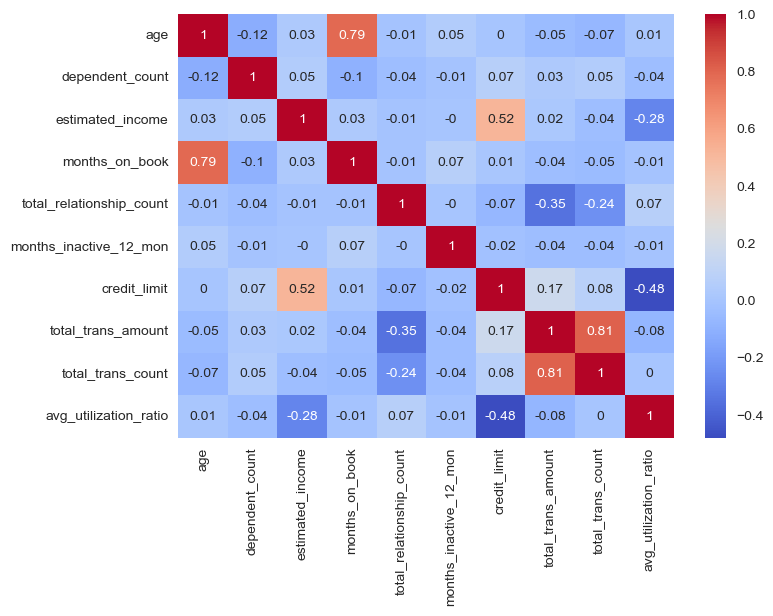

<Figure size 1200x800 with 0 Axes>

In [13]:
#Heatmap to show correlation between features
sns.heatmap(round(data.drop(categorical_features + ['customer_id'], axis=1).corr(), 2), cmap='coolwarm', annot=True)
plt.figure(figsize=(12,8))
plt.tight_layout()
plt.show()

Most of the features show a very small correlation. We can, however, see some correlations that may prove to be interesting:

- `total_trans_amount` and `total_trans_count` are strongly correlated (`0.81`). That sounds reasonable, as it makes sense that the more times a customer has used their card the more money they spent
- `months_on_book` and `age` have a strong correlation, which, again, makes sense. The older a customer is, the more time they had to hold our card
- `credit_limit` is somewhat correlated (`0.52`) with `estimated_income`, and negatively correlated (`-0.48`) with `avg_utilization_ratio`

Next, let's look at the distributions of the numeric columns

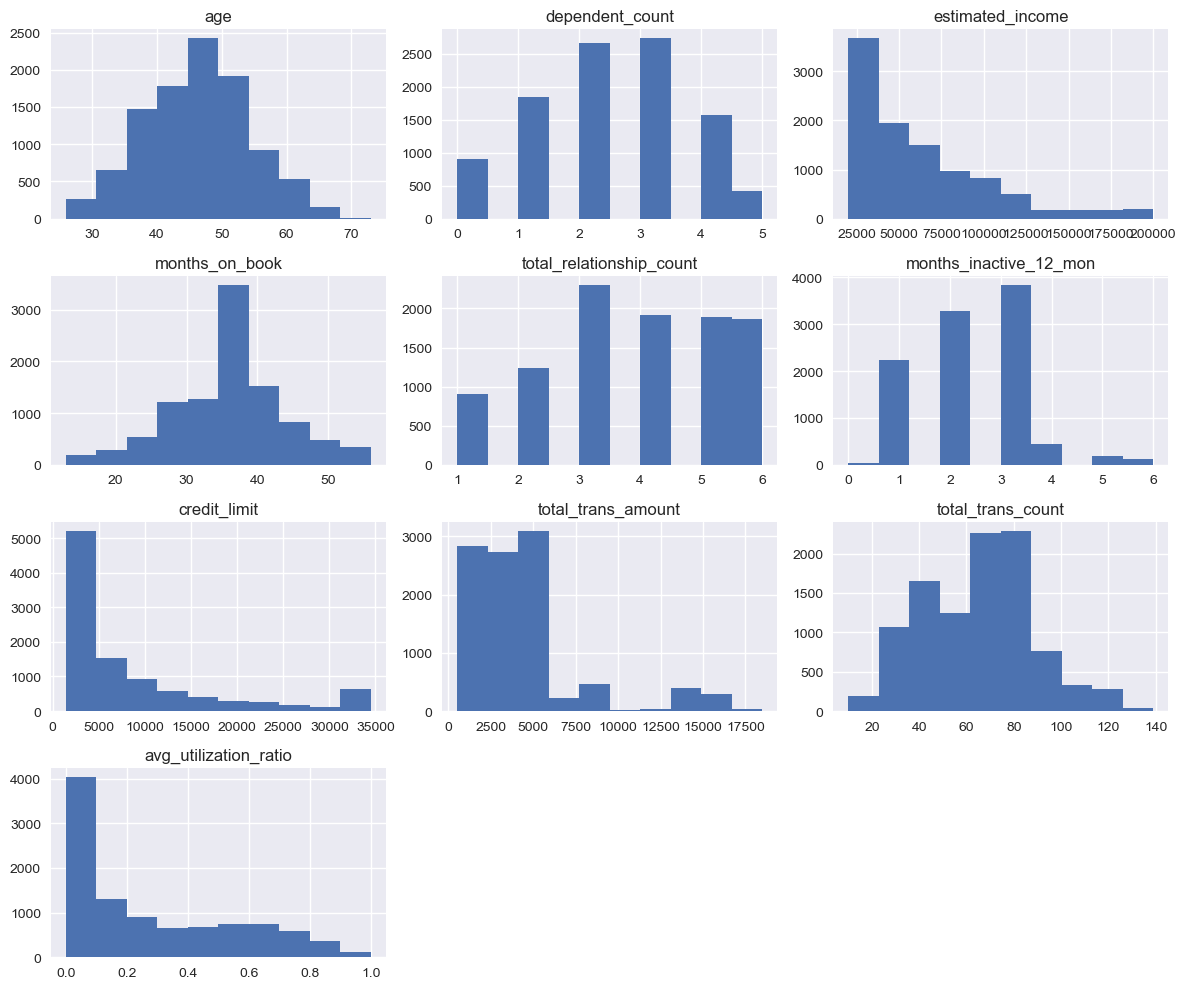

In [15]:
data.drop(categorical_features + ['customer_id'], axis=1).hist(figsize=(12, 10))

plt.tight_layout()
plt.show()

In [26]:
data.drop('customer_id', axis=1).describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


Looking at the above histogram plots and table, we can see that:
- There are no glaring outliers
- `estimated_income`, `credit_limit`, `total_trans_amount` and `avg_utilization_ratio` are right-skewed.
- `age`, `months_on_book` and `total_trans_count` are more normally-distributed

## 3. Feature Engineering

In this section we'll be processing the data to make it suitable for the knn algorithm.

In [31]:
# Make a copy of the dataset, before making modifications to it
data_modif = data.copy()

In [33]:
#Let's start with replacing the gender data with 0/1
data_modif['gender'] = data_modif['gender'].map({'M':1, 'F':0})

#Similar replacement for education level
education_level_to_int = {
    'Uneducated' : 0,
    'High School' : 1,
    'College' : 2,
    'Graduate' : 3,
    'Post-Graduate' : 4,
    'Doctorate' : 5
}

data_modif['education_level'] = data_modif['education_level'].map(education_level_to_int)

#There's not objective way to order marital status, so let's use hot-one-encoding to create dummy variables
data_modif = pd.get_dummies(data_modif, columns=['marital_status'], dtype=int, drop_first=True)


## 4. Scaling the data

To make sure we work with the data effectively, all values should be scaled similarly

In [37]:
#dataset for scaling
clean_data = data_modif.drop('customer_id', axis=1).copy()

# Instantiate a new scaler
scaler = StandardScaler()
#fit the dataframe
scaler.fit(clean_data)
#Scale the dataframe
scaled_data = pd.DataFrame(scaler.transform(clean_data), columns=clean_data.columns)
scaled_data

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.662787,-0.281380,0.509840,-0.522785,-0.337598,-0.509330,3.259358,2.221481,0.678714,-0.928214,1.252337,-0.282609
10123,-0.664382,1.059956,-0.266547,0.662787,-0.560775,-1.368442,0.120579,-0.337598,-0.479181,1.283475,0.176440,0.856458,-0.928214,-0.798507,-0.282609
10124,-0.290150,-0.943436,-1.036462,-0.752211,-0.738571,0.008965,0.763943,0.651940,-0.354626,1.732994,-0.207005,-0.997155,1.077338,-0.798507,-0.282609
10125,-2.036565,1.059956,-0.266547,0.662787,-0.382978,0.008965,0.120579,0.651940,-0.368710,1.174848,-0.121795,-0.997155,-0.928214,-0.798507,3.538459


## 5. Choosing the best K value

Now that the data is cleaned and has been processed, it is no ready for machine learning. First, we need to decide on the best number of clusters to use. We can find this by investigating the intertia parameter. For this, we'll create several models and compute the intertia from each one to plot "the elbow curve", which will give us an idea of the best K value to use to perform the real clusterization.

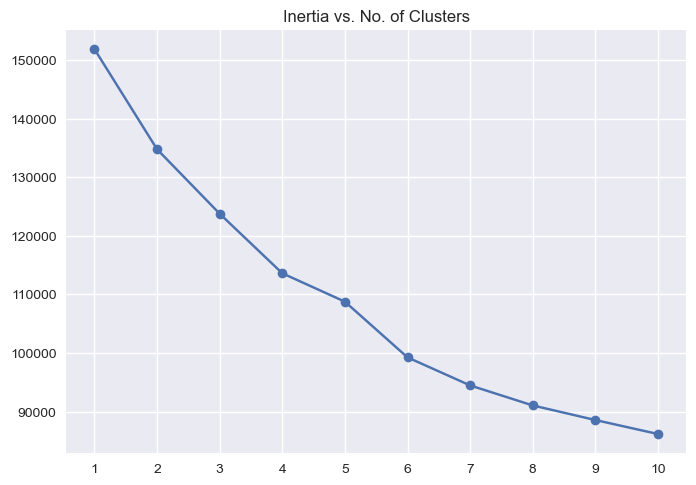

In [41]:
#Getting the intertia values to plot the elbow curve
inertias = []
for i in range(1, 11):
    model = KMeans(n_clusters = i)
    model.fit_predict(scaled_data)
    inertias.append(model.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title("Inertia vs. No. of Clusters")
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.show()

Since there's no clear elbow, let's look at the percent decrease in inertia to try and find a good candidate:

In [43]:
percent_decrease = [(1 - (inertias[i] / inertias[i - 1])) * 100 for i in range(1, 10)]

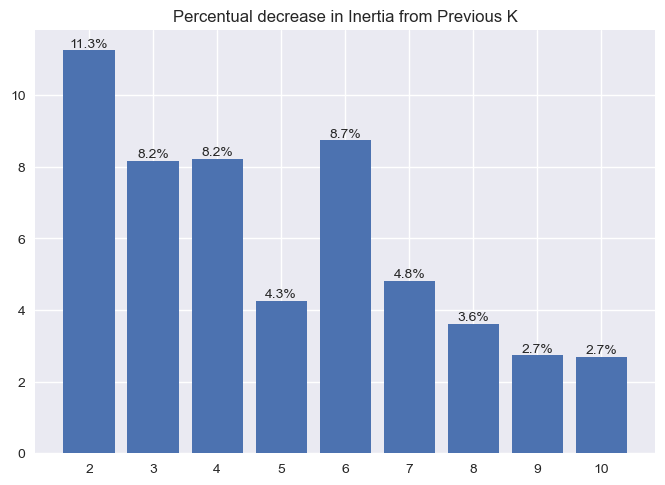

In [45]:
ax = plt.bar(range(2, 11), percent_decrease)
plt.bar_label(ax, fmt='%.1f%%')
plt.title("Percentual decrease in Inertia from Previous K")
plt.xticks(ticks=range(2, 11), labels=range(2, 11))
plt.show()

In [47]:
model = KMeans(n_clusters = 6)
clusters = model.fit_predict(scaled_data)

# Analyzing results

Now that we have our results, the next stage is to investigate how the variables are distinct from cluster to cluster in order to be understand the profile of each cluster. From that information, we can summize what marketing strategies might be appropriate.

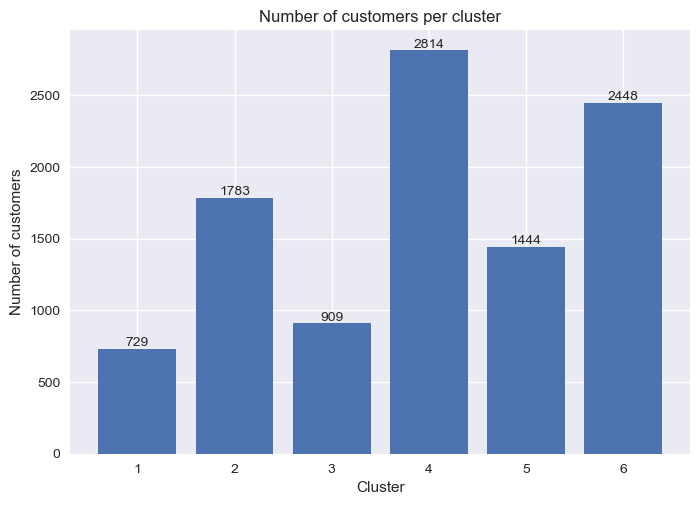

In [53]:
data['CLUSTER'] = clusters + 1
ax = plt.bar(range(1, 7), data['CLUSTER'].value_counts().sort_index())
plt.title("Number of customers per cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of customers")
plt.bar_label(ax)
plt.show()

We can see we have three larger clusters (2,4,6) and 3 smaller clusters (1,3,5)

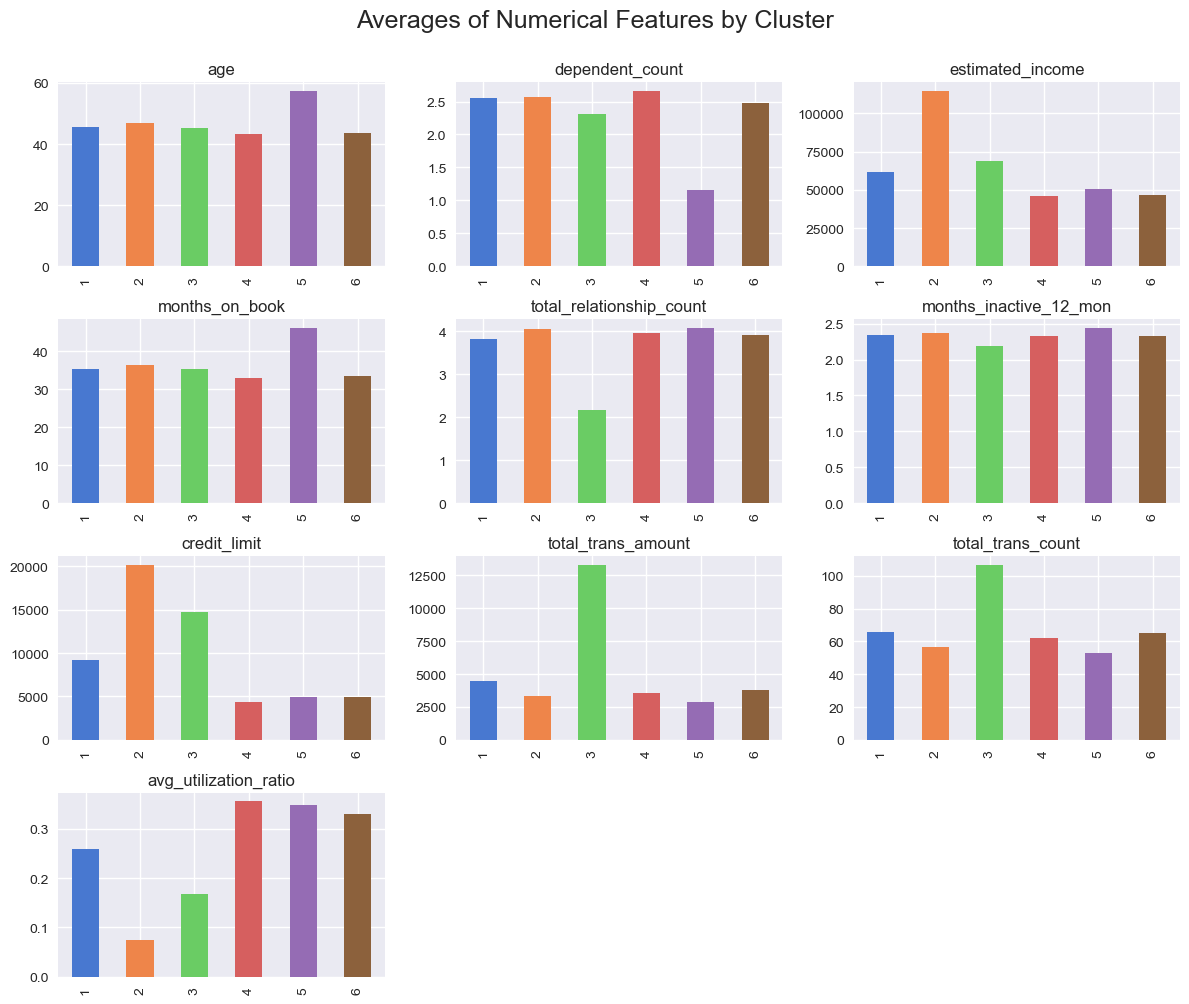

In [56]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Averages of Numerical Features by Cluster", fontsize=18, y=1.0)

numeric_features = data.drop(categorical_features + ['customer_id', 'CLUSTER'], axis=1).columns
    
# set number of columns
ncols = 3
# calculate number of rows
nrows = len(numeric_features) // ncols + (len(numeric_features) % ncols > 0)

# loop through the length of numeric_features and keep track of index
for i, feature in enumerate(numeric_features):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, i + 1)

    # group the data by clusters and plot the feature on the new subplot axis
    data.groupby('CLUSTER')[feature].mean().plot.bar(ax=ax, figsize=(12, 10), color=sns.color_palette('muted'))

    # chart formatting
    ax.set_title(feature)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

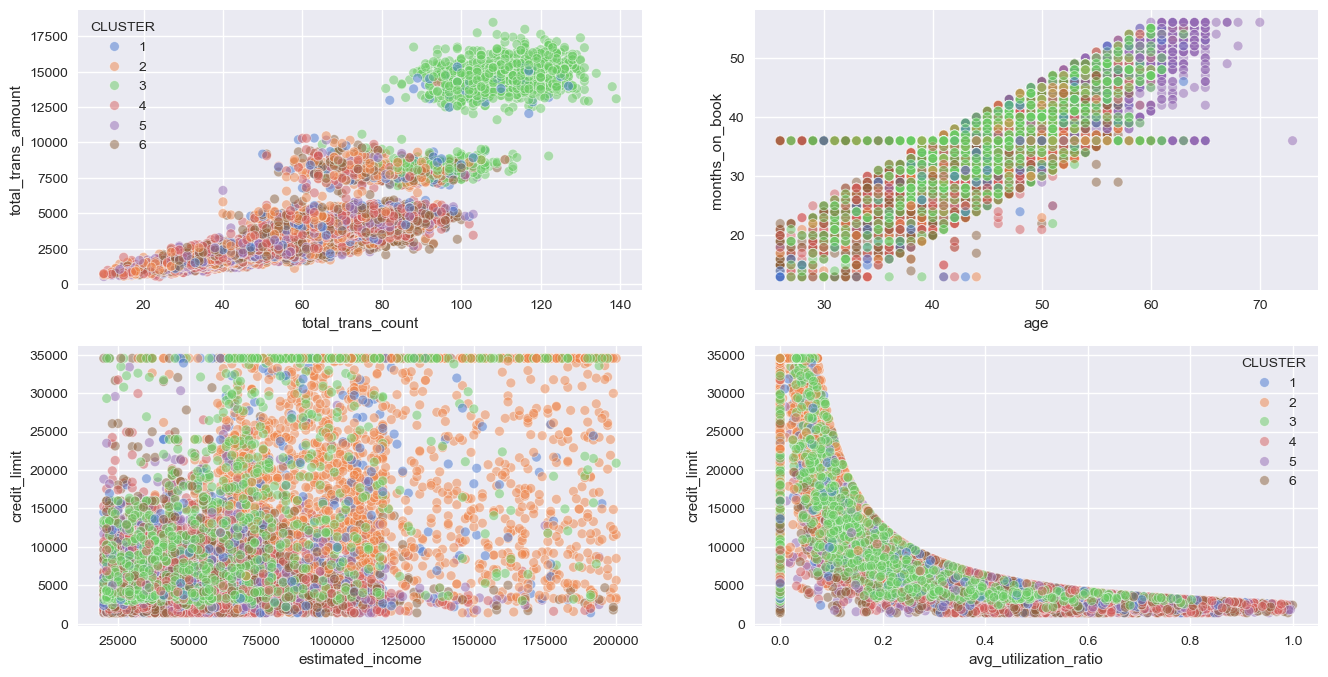

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))

sns.scatterplot(data=data, y='total_trans_amount', x='total_trans_count', hue='CLUSTER', palette='muted', alpha=0.5, ax=ax1)
sns.scatterplot(data=data, y='months_on_book', x='age', hue='CLUSTER', palette='muted', alpha=0.5, legend=False, ax=ax2)
sns.scatterplot(data=data, y='credit_limit', x='estimated_income', hue='CLUSTER', palette='muted', alpha=0.5, legend=False, ax=ax3)
sns.scatterplot(data=data, y='credit_limit', x='avg_utilization_ratio', hue='CLUSTER', palette='muted', alpha=0.5, ax=ax4)
plt.show()

Some early conclusions that we can make is that cluster 3 is composed of people with many different transactions, has a higher than average month on the books, aswell as a variable credit limit. Cluster 1 has a much higher than average months on the book, and that orange as a wide range of estimated income skewed towards the higher side.

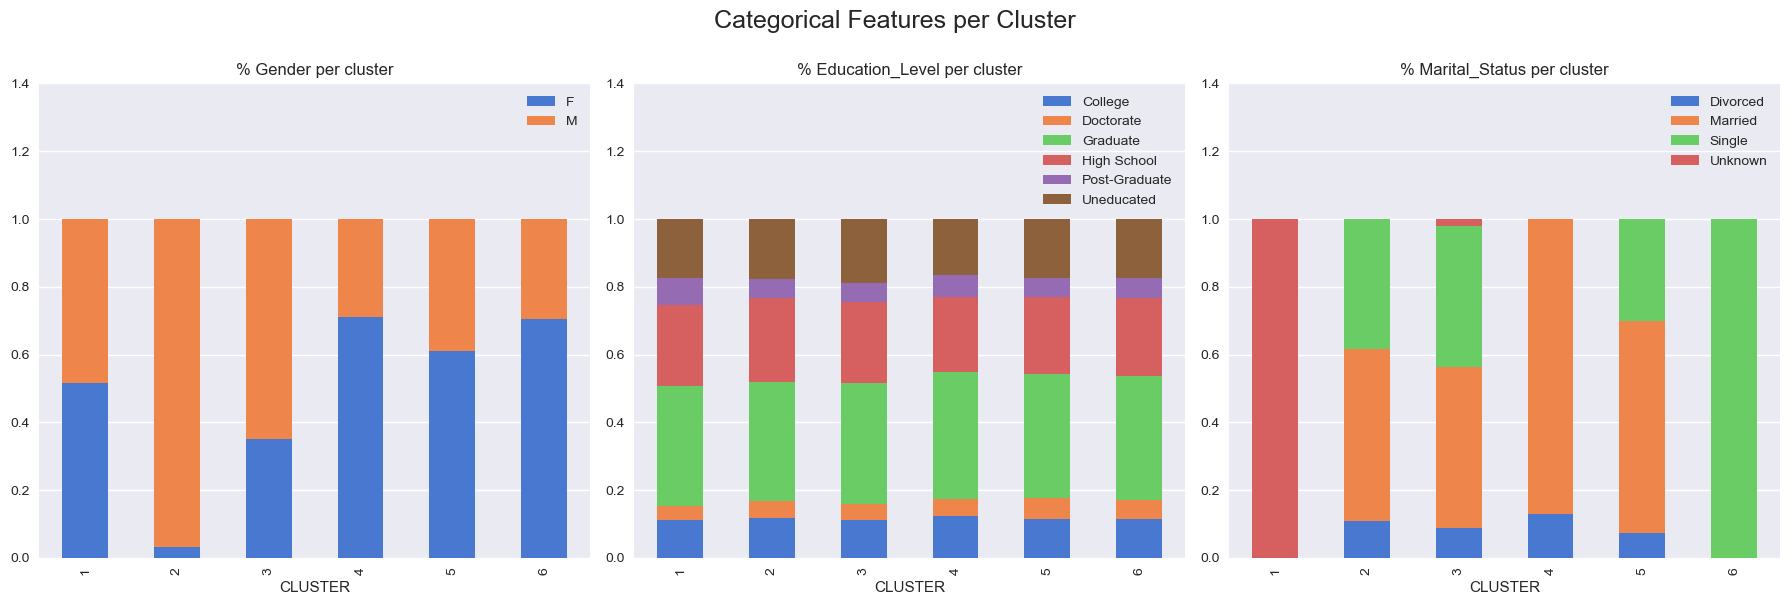

In [61]:
plt.figure(figsize=(18, 6))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Categorical Features per Cluster", fontsize=18, y=1.0)

for i, col in enumerate(categorical_features):
    plot_df = pd.crosstab(index=data['CLUSTER'], columns=data[col], values=data[col], aggfunc='size', normalize='index')

    ax = plt.subplot(1, 3, i + 1)
    plot_df.plot.bar(stacked=True, ax=ax, color=sns.color_palette('muted'))
    ax.set_title(f"% {col.title()} per cluster")

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

    labels = ['0%', '20%', '40%', '60%', '80%', '100%']
    #ax.set_yticklabels(labels)
    
plt.tight_layout()
plt.show()

Based on these stacked barchats, we can see that cluster 2 is predominantly male. Interestingly all clusters are similar in terms of education level, and cluster one a compelete lack of information data on marital status, whilst cluster 6 is completely single. Cluster 4 is predominantly married.

# Conclusion

This analysis has revealed distinct characteristics for each cluster:

### Cluster 1:

Characteristics:
Unknown relationship status, low credit limit with average credit utilization

insights:
More analysis on their relationship status is needed. A more financially strained cluster of customers, services to help them understand the benefits of using more credit could be beneificial.

### Cluster 2:

characteristics:
High income, high credit limit, low transaction amount and very low credit utilization ratio

insights:
high earners who may not realize the potential credit they could use. Tailored products and services towards high incomes would be key here.

### Cluster 3:

characteristics:
slightley higher income, very low interaction with the company, higher credit limit with very high transaction amount over many transactions. Slightly below average utilization, predominantly men

insights:
This is a high income cluster which doesn't get into contact with the company often - more effort should be made to show customers how to get in contact with use to faciliate a positive relationships. As a richer cluster their average utilization is lower, so perhaps a more tailored approach to products for a middle to upper-middle class lifestyle should be made.

### Cluster 4:

characteristics:
A low income with a low credit limit. A low transaction amount over many transactions with a high utilization ratio. Predominantly married

insights:
As this group is reaching their credit limit often, it would be good to focus workshops on financial literacy so they don't go into undue debt that may be difficult to pay off.

### Cluster 5:

characteristics:
Older age group, low dependents, low income, low credit limit with a high utilization ratio, highest on months on books

insights:
This older group of loyal customers are a highly engaged high spending group that utilize our credit card services well. Retaining that loyalty should be a priority.

### Cluster 6:

characteristics:
Similar to cluster 4, a low income with a low credit limit with a high utilization ratio

insights:
This group of people are similar to cluster 4, so a similar approach would be appropriate.

# Next Steps

* build a model that use fewer variables to see if it still provides good clusterization
* experiment on different number of clusters based on the marketing team's capacity